<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan Praktikum

link gambar : https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=sharing

## Object Detection
Metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Cornder Detection
4. Grid Detection
5. Contour Detection

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
folder_path = '/content/drive/MyDrive/Kuliah/Semester 5/PengolahanCitra/Object Detection/'

# Template Matching

2.

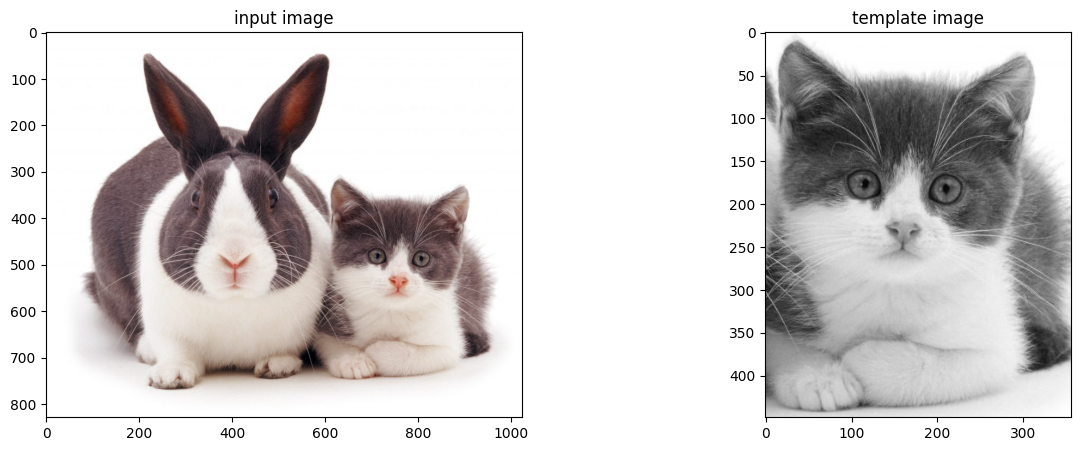

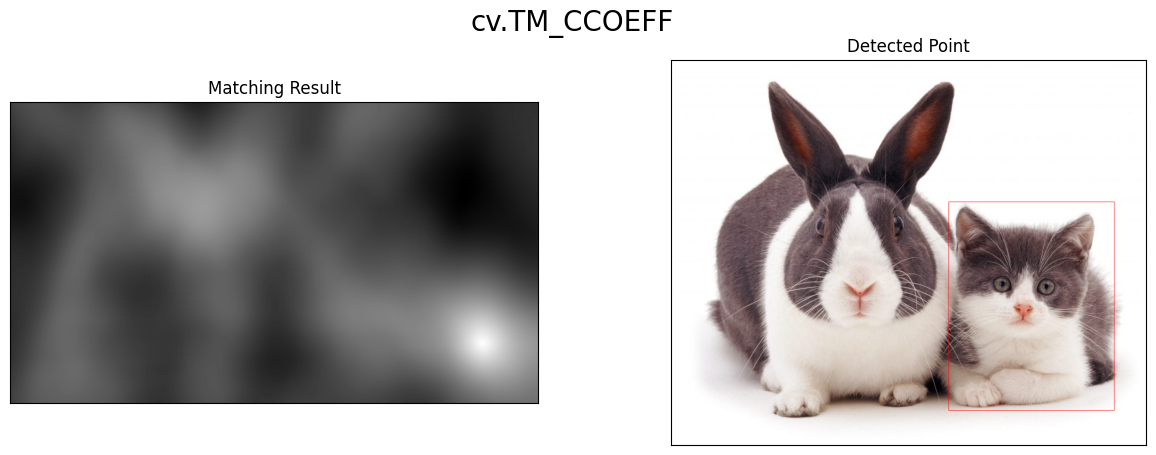

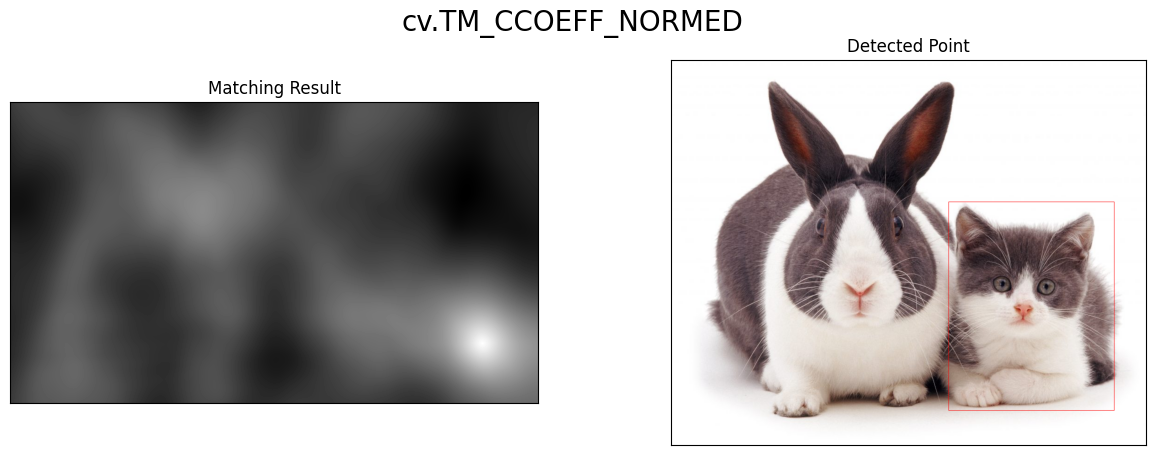

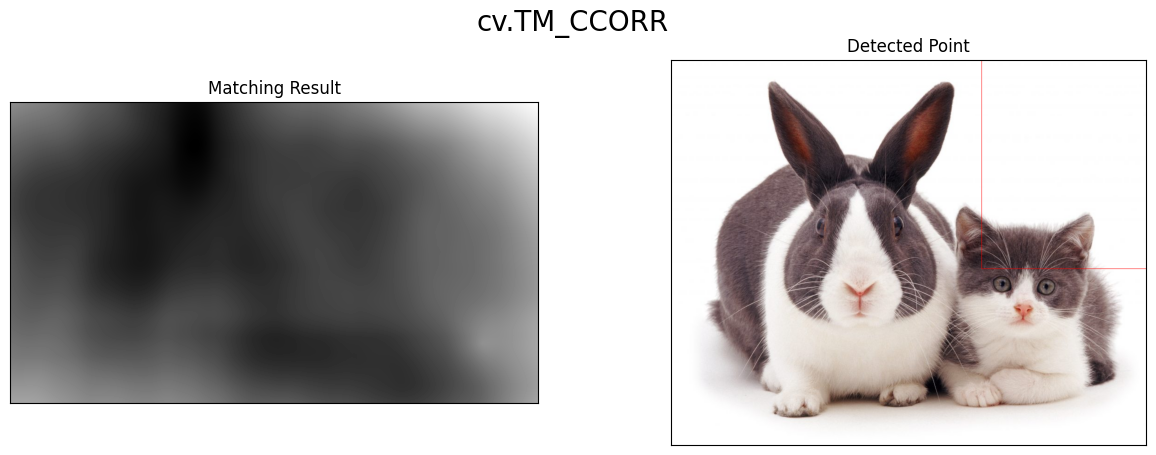

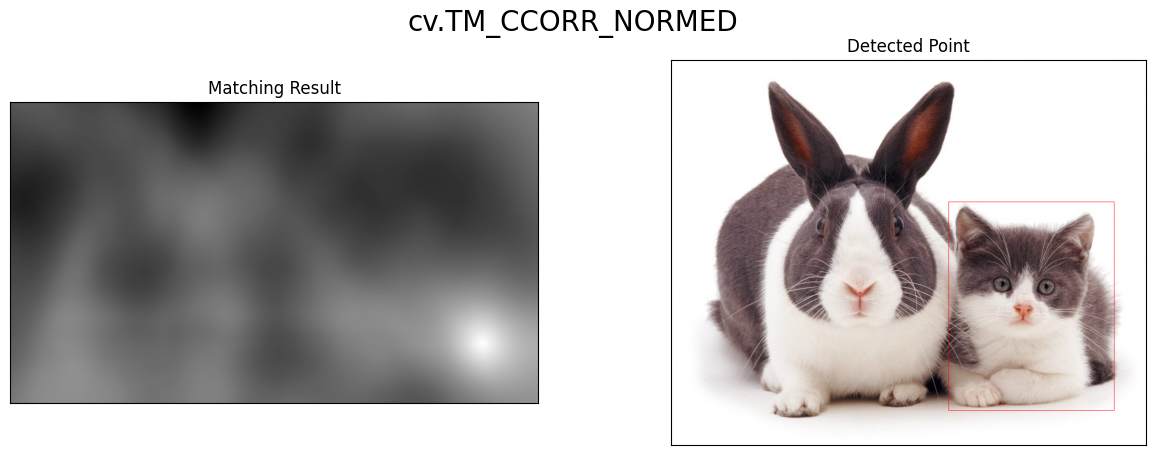

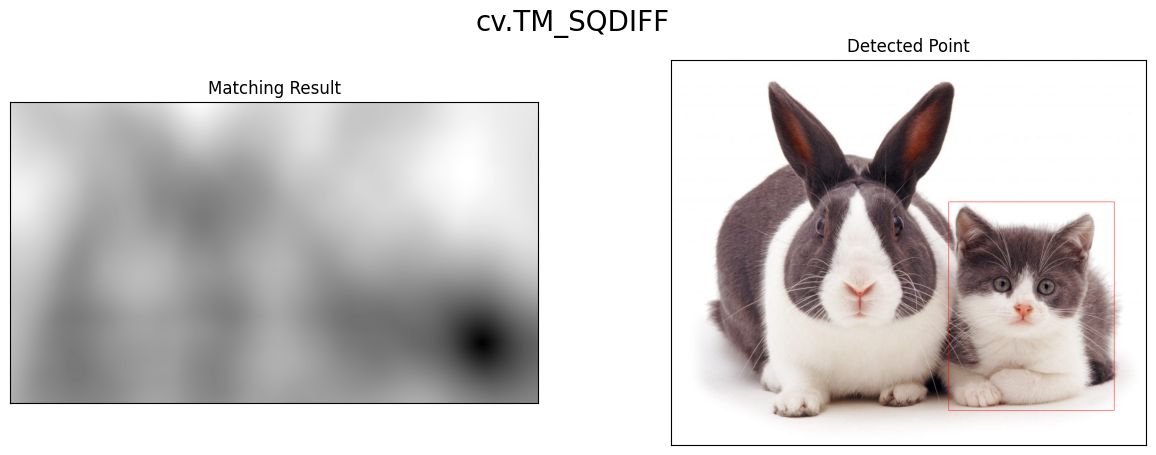

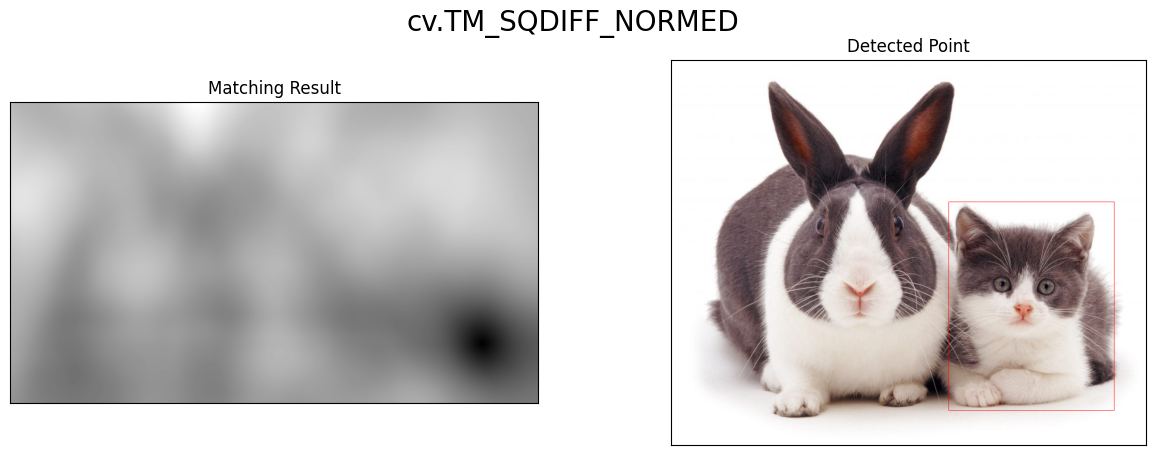

In [59]:
file_name1 = folder_path + 'cats_and_bunnies.jpg'
file_name2 = folder_path + 'cat2_templatejpg.jpg'
# load citra input

img = cv.imread( file_name1)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread(file_name2, 0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3.


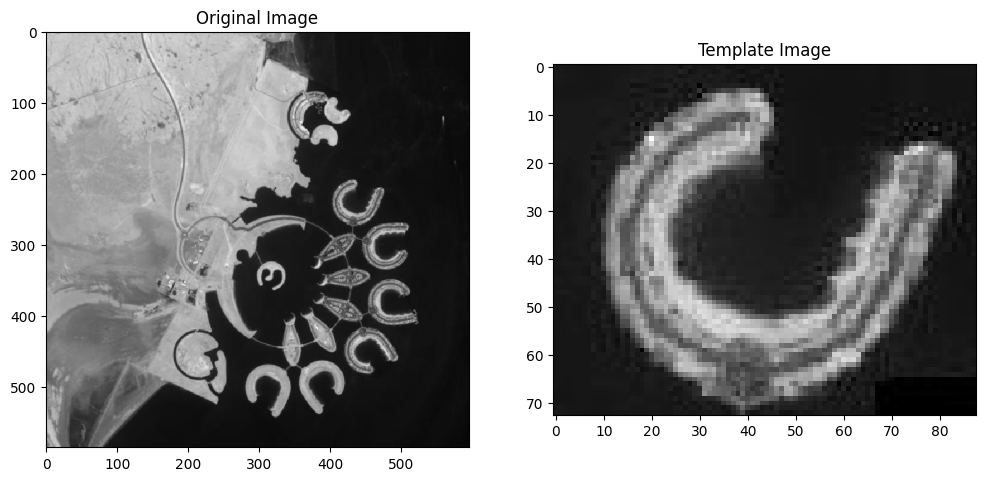

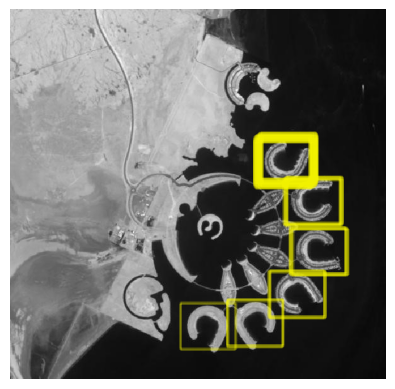

In [62]:
from skimage.feature import match_template

image = cv.imread(folder_path + 'bahrain.jpg', 0)
template_image = cv.imread(folder_path +'bahrain-template.jpg', 0)

fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(template_image, cmap='gray')
axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(image, template_image)

# Tentukan threshold untuk hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template_image.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

4.

a. Sobel Edge Detection

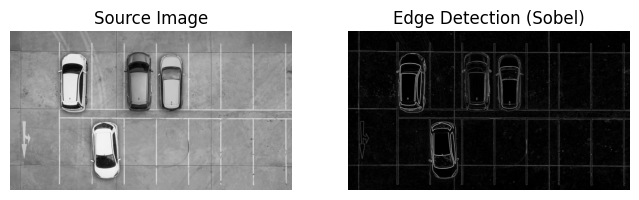

In [36]:
file_name = 'car-park.jpg'

# Baca gambar sumber
source_image = cv.imread(folder_path + file_name, cv.IMREAD_GRAYSCALE)

# Terapkan filter Sobel untuk deteksi tepi dalam arah horizontal
sobel_x = cv.Sobel(source_image, cv.CV_64F, 1, 0, ksize=3)

# Terapkan filter Sobel untuk deteksi tepi dalam arah vertikal
sobel_y = cv.Sobel(source_image, cv.CV_64F, 0, 1, ksize=3)

# Hitung magnitude tepi
edge_magnitude = cv.magnitude(sobel_x, sobel_y)

# Normalisasi magnitude tepi
edge_magnitude = cv.normalize(edge_magnitude, None, 0, 255, cv.NORM_MINMAX).astype('uint8')

# Menampilkan gambar sumber
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(source_image, cmap='gray')
plt.title('Source Image')
plt.axis('off')

# Menampilkan hasil deteksi tepi
plt.subplot(122)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

plt.show()


